<font size = "6">
<b>PCA</b>
</font>

Table of Contents
<div id="toc"></div>

# 1. Principal Component Analysis

Question: Can we describe high-dimensional data in a "simpler" way? <br>
$\rightarrow$ Dimension reduction without losing too much information <br>
$\rightarrow$ Find a low-dimensional, yet useful representation of the data

- Why dimensionality reduction?
    - insights into the low-dimensinal structures in the data (visualization)
    - Fewer dimensions ⇒ Less chances of overfitting ⇒ Better generalization
    - <font color='blue'>Speeding up</font> learning algorithms
        - Most algorithms scale badly with increasing data dimensionality
    - <font color='blue'>Less storage</font> requirements (data compression)
    - Note: Dimensionality Reduction is <font color='red'>different from Feature Selection</font>
        - .. although the goals are kind of the same
    - Dimensionality reduction is more like “<font color='red'>Feature Extraction</font>”
        - Constructing a small set of new features from the original features


- How? <br>
idea: highly correlated data contains redundant features

<img src="./image_files/pca_redundancy.png", width = 500>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            $$ h(\omega_1 x_1 + \omega_2 x_2) \sim h(\omega' x_1) \sim h(\omega'' x_2) \sim h(\omega''' (c_1 x_1 + c_2 x_2))$$
        </td>
        <td width = 48%>
            <img src="./image_files/data.png", width = 250>
        </td>
    </tr>
</table>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">
- Each example $x$ has 2 features $\{x_1,x_2\}$<br>
- Consider ignoring the feature $x_2$ for each example<br>
- Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{x_1\}$<br>
- Are we losing much information by throwing away $x_2$ ?<br>
- No. Most of the data spread is along $x_1$ (very little variance along $x_2$)
        </td>
        <td width = 36%>
<img src="./image_files/data_indep.png", width = 250>
        </td>
    </tr>
</table>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">
    - Each example $x$ has 2 features $\{x_1,x_2\}$<br>
    - Consider ignoring the feature $x_2$ for each example<br>
    - Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{x_1\}$<br>
    - Are we losing much information by throwing away $x_2$ ?<br>
    - Yes, the data has substantial variance along both features (_i.e._ both axes)
        </td>
        <td width = 36%>
<img src="./image_files/data_dep.png", width = 200>
        </td>
    </tr>
</table>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">
- Now consider a change of axes<br>
    - Each example $x$ has 2 features $\{u_1,u_2\}$<br>
    - Consider ignoring the feature $u_2$ for each example<br>
    - Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{u_1\}$<br
    - Are we losing much information by throwing away $u_2$ ?<br>
    - No. Most of the data spread is along $u_1$ (very little variance along $u_2$)            
        </td>
        <td width = 36%>
<img src="./image_files/data_u.png", width = 200>
        </td>
    </tr>
</table>

- Data $\rightarrow$ projection onto unit vector $\vec u$
    - PCA is used when we want projections capturing maximum variance directions
    - Principal Components (PC): directions of maximum variability in the data
    - Roughly speaking, PCA does a change of axes that can represent the data in a succinct manner

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/01.bmp",width=250>
        </td>
        <td width = 48%>
            <img src="./image_files/02.bmp",width=250>
        </td>
    </tr>
</table>

<img src="./image_files/pca_animation.gif", width = 700>

- HOW?
 1. Maximize variance (most separable)
 2. Minimize the sum-of-squares (minimum squared error)

## Pre-processing

- Given data $$\begin{bmatrix} \cdots & (x^{(1)})^T & \cdots\\
\cdots & (x^{(2)})^T & \cdots\\
& \vdots & \\
\cdots & (x^{(m)})^T & \cdots\\
\end{bmatrix}$$


- normalize each dimension
    1. Normalization
$$ 
\begin{align*}
\mu &= \frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)} \\
x^{(i)} &\leftarrow x^{(i)} - \mu \quad \text{(zero mean)}
\end{align*}
$$
<br>
    2. [optional] Rescaling (unit variance)
$$\begin{align*}
\sigma^2_j &= \frac{1}{m-1}\sum\limits_{i=1}{m}\left(x_j^{(i)}\right)^2 \\
x^{(i)}_j &\leftarrow \frac{x^{(i)}_j}{\sigma_j} \\
\end{align*}$$


## 1. Maximize variance

- Find unit vector $u$ such that <font color='red'>maximizes variance of projections</font>

$$\begin{align*} \text{variance of projection}
& = \frac{1}{m}\sum\limits_{i=1}^{m}\big(u^Tx^{(i)}\big)^2 \\
& = \frac{1}{m}\sum\limits_{i=1}^{m}\big( {x^{(i)}}^Tu\big)^2 \\
& = \frac{1}{m}\sum\limits_{i=1}^{m}\big( {x^{(i)}}^Tu\big)^T\big( {x^{(i)}}^Tu\big) \\
& = \frac{1}{m}\sum\limits_{i=1}^{m}u^Tx^{(i)}{x^{(i)}}^Tu \\
& = u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T \right) u \\
& =u^TSu \qquad (S : \text{sample covariance matrix})
\end{align*}$$

- In an optimization form

$$\begin{align*} \text{maximize} \quad & u^TSu \\
\text{subject to} \quad
& u^Tu = 1\end{align*}$$

<br>

$$\begin{align*} & u^TSu = u^T\lambda u = \lambda u^Tu = \lambda \quad (\text{Eigen analysis} : Su = \lambda u) \\ \\
& \implies \text{pick the largest eigenvalue } \lambda _1 \text{ of covariance matrix } S\\
& \implies u = u_1 \, \text{ is the } \,\lambda_1's \,\text{ eigenvector}\\
& \implies u_1 \text{ is the first principal component (direction of highest variance in the data)}
\end{align*}$$

## 2. Minimize the sum-of-squared error

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/sumofsquare3.png" width = 350>
        </td>
        <td width = 30%>
$$\begin{align*} \lVert e^{(i)} \rVert ^2 & = \lVert x^{(i)} \rVert ^2 - \big( {x^{(i)}}^Tu \big)^2 \\
& = \lVert x^{(i)} \rVert ^2 - \big( {x^{(i)}}^Tu \big)^T\big( {x^{(i)}}^Tu \big) \\
& = \lVert x^{(i)} \rVert ^2 - u^Tx^{(i)}{x^{(i)}}^Tu\\
\end{align*}$$
        </td>
    </tr>
</table>
<br>

$$\begin{align*} \frac {1}{m} \sum\limits_{i=1}^{m} \lVert e^{(i)} \rVert ^2
& = \frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2 - 
\frac{1}{m}\sum\limits_{i=1}^{m}u^Tx^{(i)}{x^{(i)}}^Tu \\
& = \frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2  - 
u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u \end{align*}$$

<br>

$$\begin{align*} &\text{minimize} \; \underbrace{\frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2}_{\text{constant given $x_i$}}  - 
 \underbrace{u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u}_{\text{maximize}} \\ \\
\implies &\text{maximize} \;
 u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u = \max \; u^T S u\end{align*}$$

<br>

$$ \therefore \; \text{minimize} \; error^2 = \text{maximize} \; variance$$

## Dimension Reduction method ($n \rightarrow k$)

1. Choose top $k$ (orthonormal) eigenvectors ($u_1, u_2, \cdots, u_k$)
    
2. Project $x_i$ onto span $\{ u_1, u_2, \cdots, u_k\}$
    

$$z^{(i)} = \begin{bmatrix} 
u_1^Tx^{(i)}\\
u_2^Tx^{(i)}\\
\vdots \\
u_k^Tx^{(i)}\\
\end{bmatrix} \;\text{ or }\; z = U^{T}x
$$

<br>
<img src="./image_files/summary2.png", width = 800>
<br>

$\qquad x^{(i)} \rightarrow$ projection onto unit vector $u \implies u^Tx^{(i)} = $ distance from the origin along $u$

## Matlab Codes

In [2]:
%% PCA
%

%% data generation
% two dim Gaussian random variables
% generate simulated input x and output y

m = 1000;
mu = [0 0];                % if mean is not origin, we can easily shift data to origin
SIGMA = [1 1.5; 1.5 3];
r = mvnrnd(mu,SIGMA,m);
x = r(:,1);
y = r(:,2);
X = [x y];

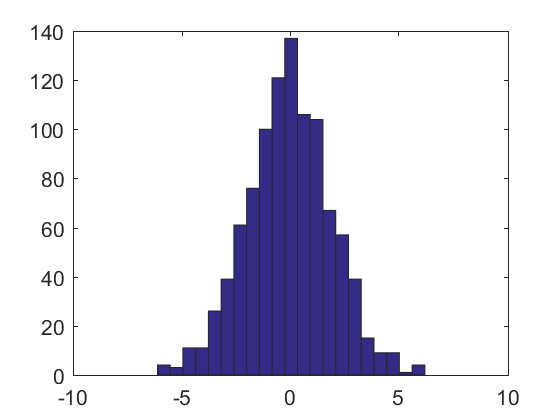

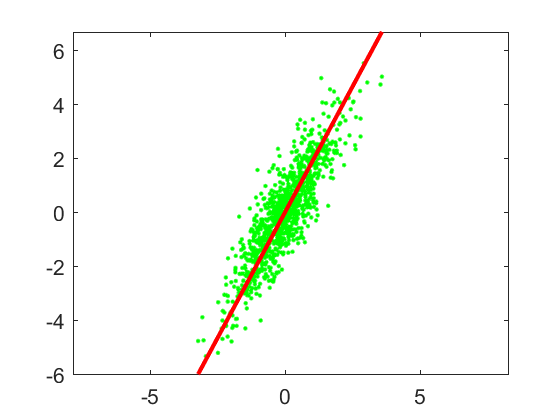

0.9979    1.4889
    1.4889    2.9692

    0.1980         0
         0    3.7691

   -0.8809    0.4733
    0.4733    0.8809


In [3]:
%% Assume we do not know mu and SIGMA. Only X is given.

S = cov(X);          % covariance
[D, V] = eig(S);     % eigenvalues and eigenvectors
disp(S)
disp(V)
disp(D)

u1 = D(:,2)/norm(D(:,2));
h = u1(2)/u1(1);

figure(1);  clf;    
h1 = plot(X(:,1),X(:,2),'g.',x,x*h,'r');
set(h1(2),'linewidth',2);   axis equal

Z = X*u1;           % this is new 1-dim (reduced or projected) data vis PCA

figure(2)
hist(Z,21)

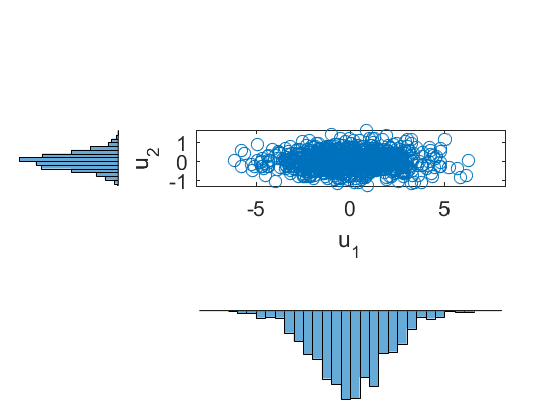

In [4]:
%% principal components and scatterhist command
theta = atan(h);
R = [cos(-theta) -sin(-theta);sin(-theta) cos(theta)];

Y = R*X';

figure(3)
scatterhist(Y(1,:),Y(2,:),'Direction','out')
xlabel('u_1'),   ylabel('u_2');
axis equal

In [5]:
%% pca - matlab embedded function

[COEFF1,score,latent] = pca([x,y]);    % compare with D
latent      % eigenvalues of the covariance matrix 

latent =

    3.7691
    0.1980


In [ ]:
%% major axis (animation)

theta = linspace(-pi/6,pi/2,20);

for i = 1:length(theta)
    u = [cos(theta(i)) sin(theta(i))]';
    proj = X*u;
    if i == 1  
        figure(5),  clf
        ax1 = subplot(1,2,1);   
        h1 = plot(X(:,1),X(:,2),'g.',x,x*tan(theta(i)));         
        ax2 = subplot(1,2,2);   h2 = histogram(proj,31);
        axis(ax2,[-7 7 0 120])
        axis(ax1,[-4 4 -6 6])
    else        
        set(h1(2),'ydata',x*tan(theta(i)))        
        subplot(1,2,2),  histogram(proj,31);  
        
        axis(ax1,[-4 4 -6 6])
        axis(ax2,[-7 7 0 120])
        refreshdata
    end
    pause()
end

%% how to find a major axis

figure(5);  clf;    
u = [1 0]';
h1 = plot(X(:,1),X(:,2),'g.',[0 2*u(1)],[0 2*u(2)],'r');  
set(h1(2),'linewidth',2)
axis equal, xlim([-5 5])

for k = 1:3
    pause
    u = S*u;
    u = u/norm(u);
    set(h1(2),'xdata',[0 2*u(1)],'ydata',[0 2*u(2)])    
    refreshdata
end

% major axis
u   % iterative
u1  % eigenvector

# 2. PCA example
- multiple video camera records of spring and mass system

<img src="./image_files/pca_spring.png", width = 500>

- source:
    - https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf



In [2]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/Pkit-64g0eU" frameborder="0" allowfullscreen>
</iframe>

In [3]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/x4lvjVjUUqg" frameborder="0" allowfullscreen>
</iframe>

In [4]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/2t62WkNIqxY" frameborder="0" allowfullscreen>
</iframe>

In [4]:
% read video files
obj1 = VideoReader([pwd,'\image_files\3-cut.mp4']);
obj2 = VideoReader([pwd,'\image_files\4-cut.mp4']);
obj3 = VideoReader([pwd,'\image_files\5-cut.mp4']);

% Unifiy video frames number to the smallest

vidFrames1 = read(obj1);
vidFrames2 = read(obj2);
vidFrames3 = read(obj3);
val = min([size(vidFrames1,4) size(vidFrames2,4) size(vidFrames3,4)]);

In [6]:
% tracking the object
% tracking red color 
% you do not need to understand how to track the object in this class

% pos_data = [];
% for j = 1:3
%     position = zeros(2,val);
%     for i = 1:val
%         % Read i-th frame in j-th video
%         eval(['data = vidFrames',num2str(j),'(:,:,:,i);'])
%         % (Red layer matrix) - (Gray scale matrix)
%         diff_im = imsubtract(data(:,:,1), rgb2gray(data));
%         % Filter the noise by median filter
%         diff_im = medfilt2(diff_im, [3 3]);
%         % Binary image with threshold 0.18
%         diff_im = im2bw(diff_im,0.18);
%         % Object less than 300 pixels is removed
%         diff_im = bwareaopen(diff_im,300);
%         % Label the objects
%         bw = bwlabel(diff_im, 8);
%         % Measure COM of connected object in binary image
%         stats = regionprops(bw,'Centroid');
%
%         for object = 1:length(stats)
%             bc = stats(object).Centroid;
%         end
%
%         position(:,i) = [bc(1); bc(2)];
%     end
%
%     pos_data = [pos_data; position];
% end

% save camera_recording pos_data

load([pwd,'\image_files\camera_recording.mat']);

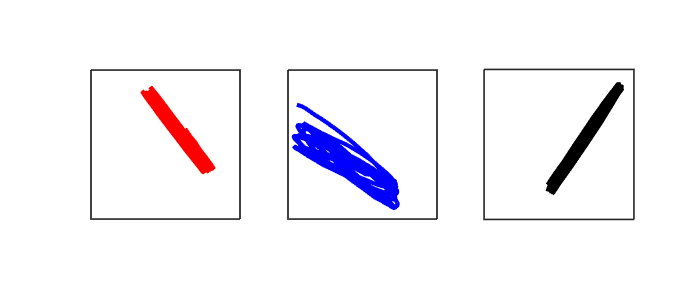

In [14]:
%plot -s 700,300
% trajectory

X = pos_data;

figure(1)
pos = X(1:2,:);
subplot(1,3,1),   plot(pos(1,:),-pos(2,:),'r','linewidth',2)
axis square,    set(gca,'xtick',[]),    set(gca,'ytick',[])

pos = X(3:4,:);
subplot(1,3,2),   plot(pos(1,:),-pos(2,:),'b','linewidth',2)
axis square,    set(gca,'xtick',[]),    set(gca,'ytick',[])

pos = X(5:6,:);
subplot(1,3,3),   plot(pos(1,:),-pos(2,:),'k','linewidth',2)
axis square,    set(gca,'xtick',[]),    set(gca,'ytick',[])

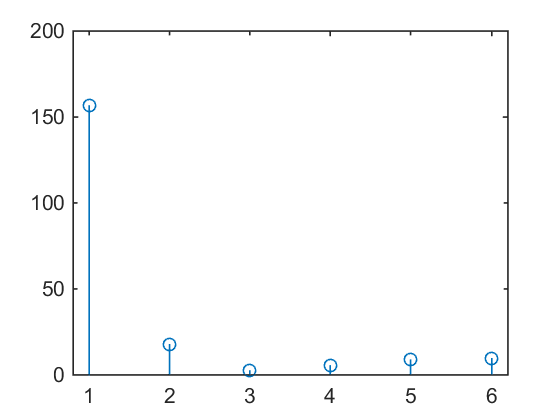

V =

    0.3688    0.6230   -0.0807    0.5212   -0.4265   -0.1257
    0.3563    0.5729    0.0873   -0.4014    0.5988    0.1323
    0.5842   -0.2261    0.0086   -0.5815   -0.4775   -0.2033
    0.0865   -0.0267   -0.6286   -0.0601   -0.1418    0.7569
    0.4160   -0.2990    0.6208    0.3244    0.0564    0.4937
   -0.4639    0.3775    0.4531   -0.3466   -0.4563    0.3296

In [21]:
%plot -s 560,420
%% PCA

[m,n] = size(X);
Xbar = mean(X,2);           % compute mean for each row
X = X - repmat(Xbar,1,n);   % subtract mean

S = 1/(n-1)*X*X';           % covariance matrix
% cov(X')                   % same

[V,D] = eig(S);             % eigenvectors and eigenvalues

figure(3)
stem(sqrt(diag(D)))
xlim([0.8 6.2]),
set(gca,'xtick',[1:6])
set(gca,'xticklabel',{'1','2','3','4','5','6'})
V

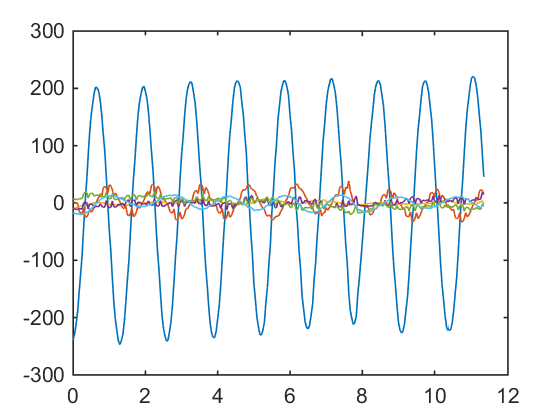

In [16]:
%
figure(4);
Y = V'*X;                   % produce principal component projection
n_pt = [0:n-1]*1/24;
plot(n_pt,Y')

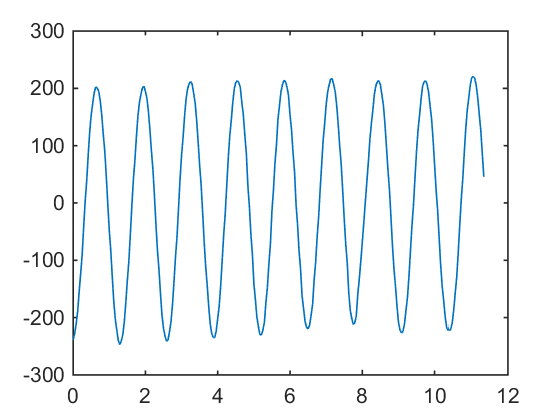

In [17]:
%% projected onto the first principal component
% 6 dim -> 1 dim (dim reduction)

figure(5);
plot(n_pt,Y(1,:)')

Reference: John P Cunningham & Byron M Yu, Dimensionality reduction for large-scale neural recordings, Nature Neuroscience 17, 1500–1509 (2014)

<img src="./image_files/pca_timeseries.png", width = 750>

# 3. PCA Visualization

## 3.1. Eigenvalues

- $\lambda_1, \lambda_2$ indicates variance along the eigenvectors, respectively.
    - The larger eigenvalue is, the more dominante feature (eigenvector) is  

<img src="./image_files/eigenvalue.png", width = 500>

## 3.2. Eigenvectors

- given basis $\{\hat{x}_1, \hat{x}_2\}$ to transformed basis $\{\hat{u}_1, \hat{u}_2\}$

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 45% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/eigenvector.png", width = 350>
        </td>
        <td width = 45%>
            $$[\hat{u}_1\; \hat{u}_2]=[\hat{x}_1 \; \hat{x}_2]\begin{bmatrix} c_1 & c_3 \\c_2 & c_4\end{bmatrix}$$
        </td>
    </tr>
</table>

## 3.3. PCA Visualization 1
- example
<img src="./image_files/pca_multivariate.png", width = 500>

## 3.4. PCA Visualization 2
- example
<img src="./image_files/pca_visualization.png", width = 500>

# 4. Probabilistic PCA (Optional)

- Assume the following generative model for each observation $x_i$

$$ x_i = W z_i + \varepsilon_i$$

- Note: We'll assume data to be centered, otherwise $x_i = \mu + W z_i + \varepsilon_i$

- Think of it as low dimensional $z_i \in \mathbb{R}^k$ generating a higher-dimensional $x_i \in \mathbb{R}^n$ via a mapping matrix $W \in \mathbb{R}^{n\times k}$, plus some noise $\varepsilon_i \sim N\left( 0,\sigma^2 I_{n \times n} \right)$

- Probabilistic Graph Model

<img src="./image_files/pca_PGM.png", width = 450>

- Intuitively, this generative model is "inverse" of what the traditional PCA does. Here we assume a latent low-dim $x_i$ that "generates" the high-dim $s_i$ via the mapping $W$ (plus adding some noise)

## Interpreting Probabilistic PCA

- We can also write $x_i = W z_i + \varepsilon_i$ as each example $x_i$ being a linear combination of columns $W = [\omega_1,\cdots,\omega_k]$, plus some noise $\varepsilon_i$

$$ 
\begin{bmatrix} x_1 \\ x_2 \\ \vdots \\\vdots\\x_n \end{bmatrix} = 
\begin{bmatrix} &  & &  \\\vert & \vert  &  & \vert  \\\omega_1 & \omega_2 & \cdots & \omega_k \\ \vert & \vert  & & \vert \\&  & &  \end{bmatrix} 
\begin{bmatrix} z_1\\z_2\\ \vdots\\z_k \end{bmatrix} + \begin{bmatrix} \varepsilon_1\\\varepsilon_2\\\vdots \\ \varepsilon_{n-1} \\\varepsilon_n \end{bmatrix}
$$


$$x  = W z + \varepsilon$$

- (latent variables) distributional assumption 

$$z \sim N(0,I_{k}), \qquad \varepsilon \sim N(0,\sigma^2I_{n})$$

- (observed variables) induced distribution on observations

$$x \sim N(0,WW^T+\sigma^2I_n)$$


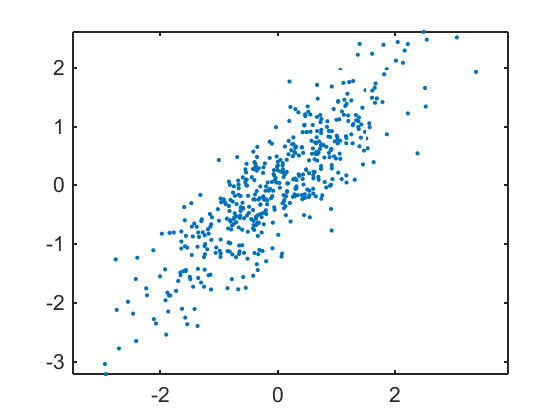

In [6]:
m = 500;
x = randn(m,1);
W = [1;
     1];
mu = [0; 0]; 
sigma = 0.1*[2 0;0 1];
noise = mvnrnd(mu,sigma,m);

y = x*W' + noise;

plot(y(:,1),y(:,2),'.')
axis equal

In [7]:
pca(y)

ans =

    0.7237   -0.6901
    0.6901    0.7237

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>